Importing Modules

In [8]:
import numpy
import random
from collections import Counter
import pandas
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Functions for train and test Single Layer Perceptron

In [3]:
def TreinamentoPerceptron(MatrizAmostras, VetorSaidasDesejadas, TaxaAprendizagem, max_epochs, seed):
    random.seed(seed)
    numpy.random.seed(seed)

    MatrizAmostras = numpy.asarray(MatrizAmostras)
    VetorSaidasDesejadas = numpy.asarray(VetorSaidasDesejadas)

    w = numpy.random.uniform(-0.01, 0.01, MatrizAmostras.shape[1])

    Epoca = 0
    for Epoca in range(1, max_epochs + 1):
        erro = 0

        for i in range(MatrizAmostras.shape[0]):
            u = numpy.dot(w, MatrizAmostras[i])
            if u >= 0:
                y = 1
            else:
                y = -1

            if y != VetorSaidasDesejadas[i]:
                w = w + TaxaAprendizagem * (VetorSaidasDesejadas[i] - y) * MatrizAmostras[i]
                erro += 1
        
        if erro == 0:
            break
    
    return w, Epoca

def FaseOperacaoPerceptron(MatrizAmostras, VetorW):
    MatrizAmostras = numpy.asarray(MatrizAmostras)
    VetorW = numpy.asarray(VetorW)

    VetorClasses = numpy.zeros(MatrizAmostras.shape[0])
    for i in range(MatrizAmostras.shape[0]):
        u = numpy.dot(VetorW, MatrizAmostras[i])
        if u >= 0:
            y = 1
        else:
            y = -1
        
        if y == -1:
            VetorClasses[i] = -1
        else:
            VetorClasses[i] = 1
    
    return VetorClasses

Diabetes Dataset - Data loading, separation and normalization (Due to Single Layer Perceptron's inherit nature, only binary classification could be done)

In [4]:
# ===== CONFIGURE HERE =====
csv_path = "../Datasets/diabetes.csv"
test_size = 0.3  
random_state = 42  

# ===== LOAD DATASET =====
df = pandas.read_csv(csv_path)
print(f"✅ Loaded dataset: {csv_path}")
print(f"   Rows: {len(df)}, Columns: {len(df.columns)}")
df = df.iloc[:, 1:]  

# ===== SPLIT DATASET =====
train_df_diabetes, test_df_diabetes = train_test_split(df, test_size=test_size, random_state=random_state)

print(f"Training set: {len(train_df_diabetes)} rows")
print(f"Test set: {len(test_df_diabetes)} rows")

# ===== OPTIONAL: inspect first few rows =====
print("\nTraining set sample:")
print(train_df_diabetes.head())
print("\nTest set sample:")
print(test_df_diabetes.head())

# Separate features and labels
X_train_diabetes = train_df_diabetes.iloc[:, :-1].values  
Y_train_diabetes = train_df_diabetes.iloc[:, -1].values  
X_test_diabetes = test_df_diabetes.iloc[:, :-1].values
Y_test_diabetes = test_df_diabetes.iloc[:, -1].values

# ===== PRINT FEATURES AND LABELS =====
print("\nX_train_diabetes:")
print(X_train_diabetes)

print("\nY_train_diabetes:")
print(Y_train_diabetes)

print("\nX_test_diabetes:")
print(X_test_diabetes)

print("\nY_test_diabetes:")
print(Y_test_diabetes)

# ===== SCALLING TO GET MEAN = 0 AND STANDARD DEVIATION = 1 =====
scaler = StandardScaler()
X_train_diabetes = scaler.fit_transform(X_train_diabetes)
X_test_diabetes = scaler.transform(X_test_diabetes)

# ===== CONVERT LABELS 0/1 -> -1/1 (DUE TO SINGLE LAYER PERCEPTRON`S ACTIVATION FUNCTION) =====
Y_train_diabetes = numpy.where(Y_train_diabetes == 0, -1, 1)
Y_test_diabetes = numpy.where(Y_test_diabetes == 0, -1, 1)

# ===== ADDING BIAS TERM (COLUMN OF 1S) =====
X_train_bias = numpy.hstack([X_train_diabetes, numpy.ones((X_train_diabetes.shape[0], 1))])
X_test_bias  = numpy.hstack([X_test_diabetes,  numpy.ones((X_test_diabetes.shape[0], 1))])

# ===== PRINT FEATURES AND LABELS =====
print("\nX_train_diabetes:")
print(X_train_diabetes)

print("\nY_train_diabetes:")
print(Y_train_diabetes)

print("\nX_test_diabetes:")
print(X_test_diabetes)

print("\nY_test_diabetes:")
print(Y_test_diabetes)

✅ Loaded dataset: ../Datasets/diabetes.csv
   Rows: 768, Columns: 9
📊 Training set: 537 rows
📊 Test set: 231 rows

Training set sample:
     Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
334       95             60             18       58  23.9   
139      105             72             29      325  36.9   
485      135             68             42      250  42.3   
547      131             68             21      166  33.1   
18       103             30             38       83  43.3   

     DiabetesPedigreeFunction  Age  Outcome  
334                     0.260   22        0  
139                     0.159   28        0  
485                     0.365   24        1  
547                     0.160   28        0  
18                      0.183   33        0  

Test set sample:
     Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
668       98             58             33      190  34.0   
324      112             75             32        0  35.7   
624      108        

Training iteratively on 100, 1000, 10000 and 100000 epochs

In [13]:
Epocas = [100, 1000, 10000, 100000]
VetorW = []
for i in range(len(Epocas)):
    w, Epoca = TreinamentoPerceptron(X_train_diabetes, Y_train_diabetes, 0.1, Epocas[i], 42)
    VetorW.append(w)
    print("Pesos finais:", w)
    print("Epocas: ", Epoca)

Pesos finais: [ 0.5423277  -0.38232747 -0.21471417  0.31583486  0.65357107  0.66780709
  0.2340327 ]
Epocas:  100
Pesos finais: [ 0.11610652 -0.20168601 -0.21035838  0.19276968  0.64527388  0.54705721
  0.2622023 ]
Epocas:  1000
Pesos finais: [ 0.05392837 -0.2374105  -0.29453835  0.19592486  0.38823202  0.3394811
  0.34929515]
Epocas:  10000
Pesos finais: [ 0.67622859 -0.49081948 -0.32551023  0.33766551  0.69557042  0.62358647
  0.39006609]
Epocas:  100000


Testing iteratively on 100, 1000, 10000 and 100000 epochs

Accuracy (100 épocas): 0.7229
Precision (100 épocas): 0.5690
Recall (100 épocas): 0.8250
F1-Score (100 épocas): 0.6735


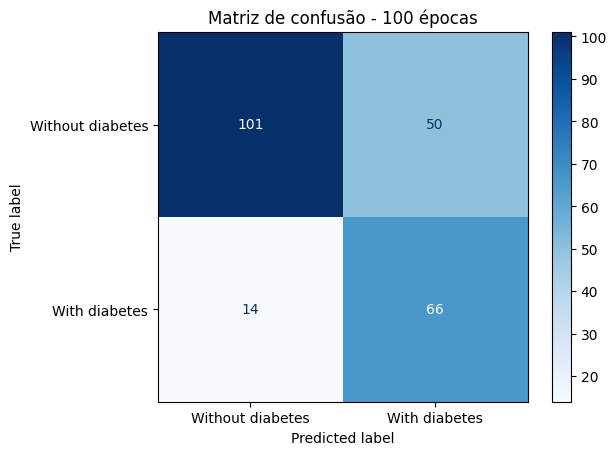

Accuracy (1000 épocas): 0.6840
Precision (1000 épocas): 0.5310
Recall (1000 épocas): 0.7500
F1-Score (1000 épocas): 0.6218


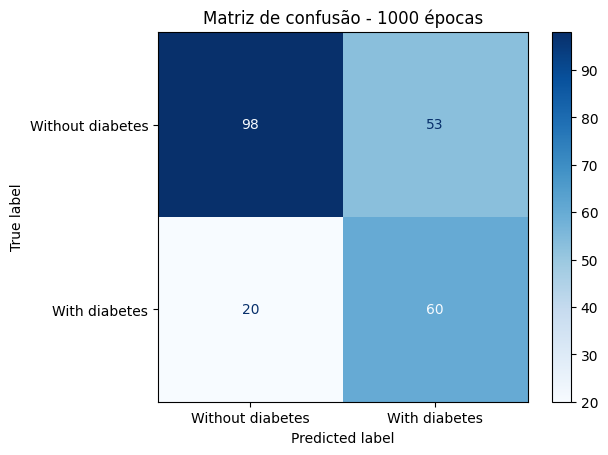

Accuracy (10000 épocas): 0.6580
Precision (10000 épocas): 0.5043
Recall (10000 épocas): 0.7375
F1-Score (10000 épocas): 0.5990


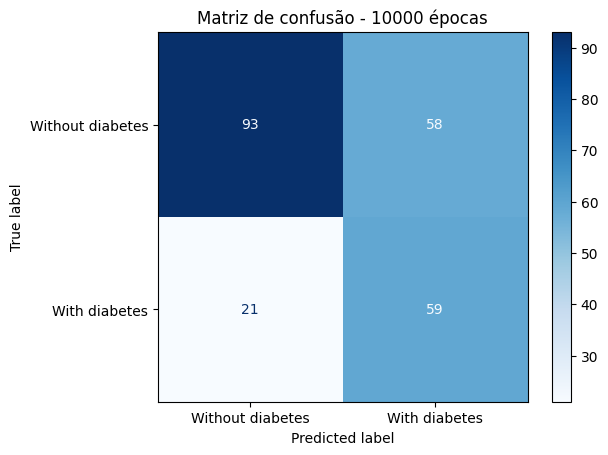

Accuracy (100000 épocas): 0.7359
Precision (100000 épocas): 0.5841
Recall (100000 épocas): 0.8250
F1-Score (100000 épocas): 0.6839


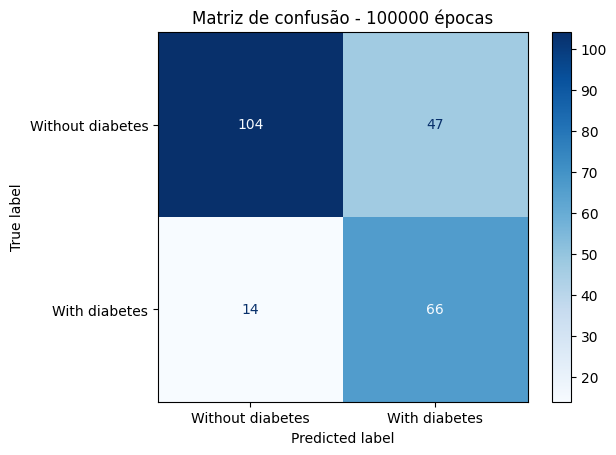

In [14]:
from sklearn.metrics import f1_score, precision_score, recall_score


for i in range(len(Epocas)):
    VetorClasses = FaseOperacaoPerceptron(X_test_diabetes, VetorW[i])

    acc = accuracy_score(Y_test_diabetes, VetorClasses)
    prec = precision_score(Y_test_diabetes, VetorClasses)
    rec = recall_score(Y_test_diabetes, VetorClasses)
    f1 = f1_score(Y_test_diabetes, VetorClasses)
    print(f"Accuracy ({Epocas[i]} épocas): {acc:.4f}")
    print(f"Precision ({Epocas[i]} épocas): {prec:.4f}")
    print(f"Recall ({Epocas[i]} épocas): {rec:.4f}")
    print(f"F1-Score ({Epocas[i]} épocas): {f1:.4f}")

    cm = confusion_matrix(Y_test_diabetes, VetorClasses, labels=[-1, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Without diabetes", "With diabetes"])
    disp.plot(cmap="Blues")
    plt.title(f"Matriz de confusão - {Epocas[i]} épocas")
    plt.show()

Training and testing iteratively on 10, 20, 30, 40, 50, 60, 70, 80, 90 and 100 epochs just to achive peace of mind

Pesos finais: [ 0.28745954 -0.20084132 -0.50106567  0.29772248  0.56029243  0.33301675
  0.47872216]
Epocas:  10
Pesos finais: [ 0.23102197 -0.41170643 -0.35265575  0.51330742  0.27370435  0.29310062
  0.31474513]
Epocas:  20
Pesos finais: [ 0.10206629 -0.12100719 -0.22005664 -0.07734982  0.50595242  0.25760774
  0.43070943]
Epocas:  30
Pesos finais: [ 0.2871483  -0.15160168 -0.15746313 -0.36871423  0.49210584  0.43105315
  0.27547359]
Epocas:  40
Pesos finais: [ 0.08961683 -0.26823162 -0.54479209  0.14630916  0.45481981  0.55360982
  0.15268223]
Epocas:  50
Pesos finais: [ 0.24482013 -0.27748208 -0.53615269  0.5496325   0.17629912  0.28139571
  0.24385856]
Epocas:  60
Pesos finais: [ 0.24758667 -0.39596623 -0.14665786 -0.19962216  0.52023415  0.19838684
  0.10958243]
Epocas:  70
Pesos finais: [ 0.02553668 -0.27020945 -0.15125431  0.08752563  0.25144812  0.49706206
  0.31174633]
Epocas:  80
Pesos finais: [ 0.25619755 -0.5425108  -0.39869242 -0.03563988  0.5743737   0.09671397
  0.52102

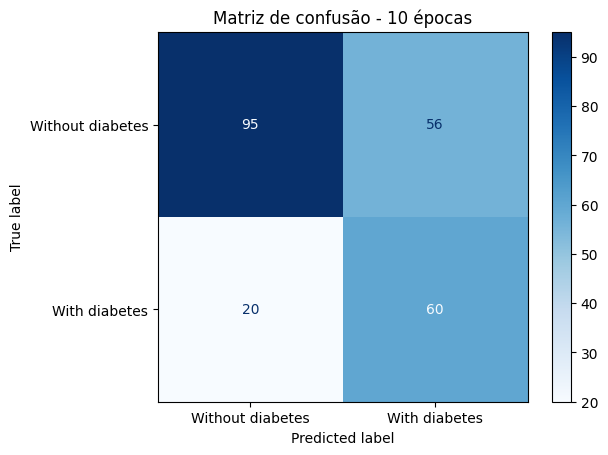

Accuracy (20 épocas): 0.6537
Precision (20 épocas): 0.5000
Recall (20 épocas): 0.6875
F1-Score (20 épocas): 0.5789


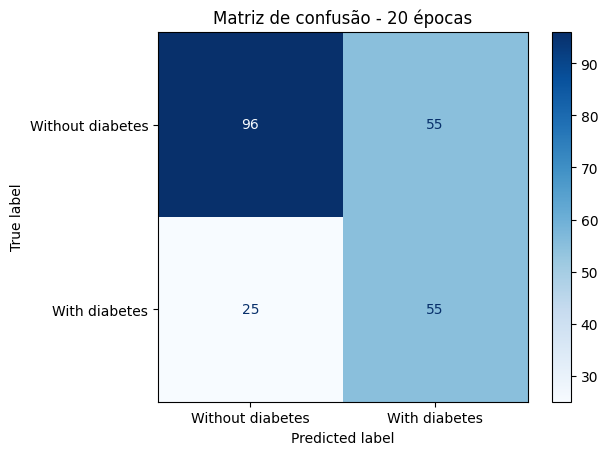

Accuracy (30 épocas): 0.6710
Precision (30 épocas): 0.5167
Recall (30 épocas): 0.7750
F1-Score (30 épocas): 0.6200


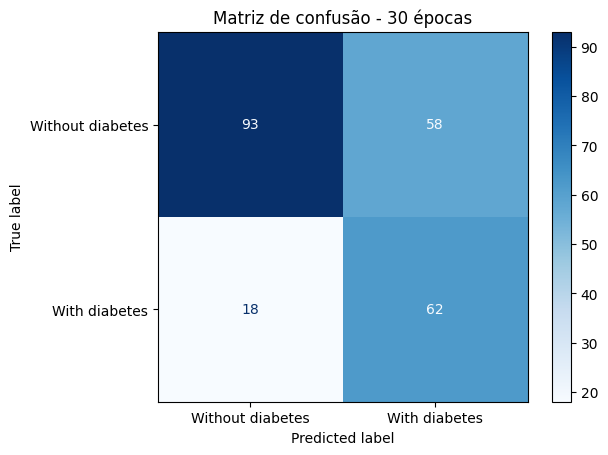

Accuracy (40 épocas): 0.6753
Precision (40 épocas): 0.5229
Recall (40 épocas): 0.7125
F1-Score (40 épocas): 0.6032


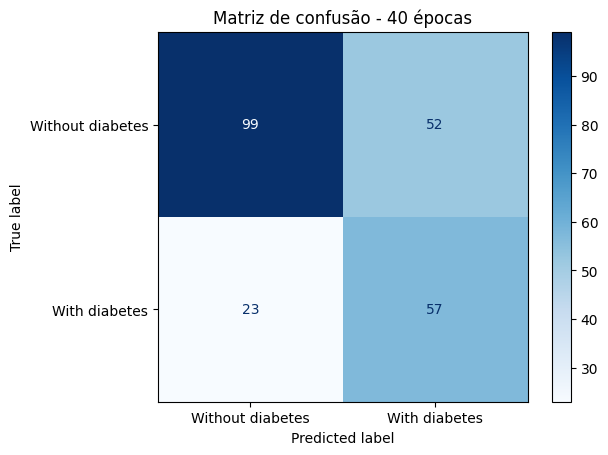

Accuracy (50 épocas): 0.6494
Precision (50 épocas): 0.4953
Recall (50 épocas): 0.6625
F1-Score (50 épocas): 0.5668


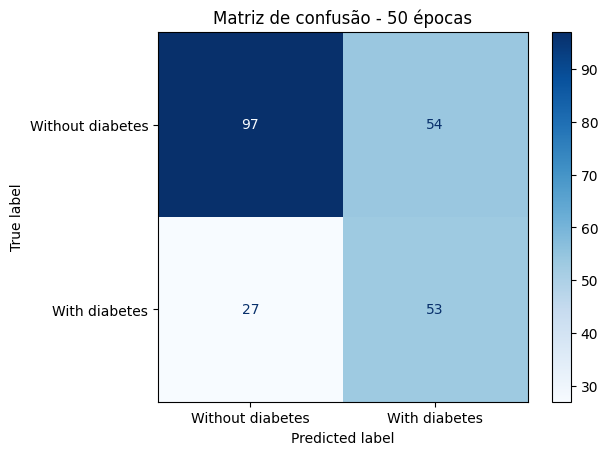

Accuracy (60 épocas): 0.6450
Precision (60 épocas): 0.4909
Recall (60 épocas): 0.6750
F1-Score (60 épocas): 0.5684


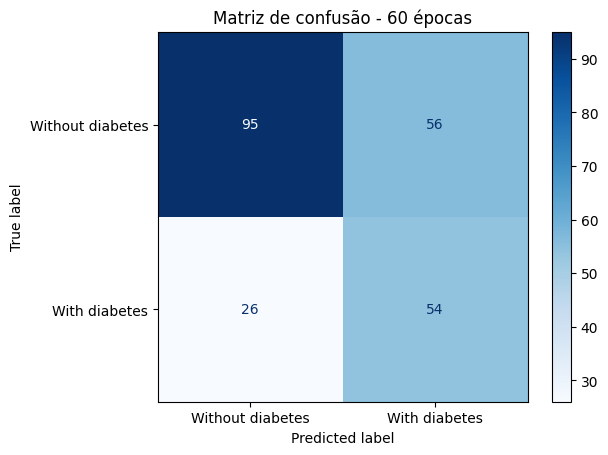

Accuracy (70 épocas): 0.6797
Precision (70 épocas): 0.5288
Recall (70 épocas): 0.6875
F1-Score (70 épocas): 0.5978


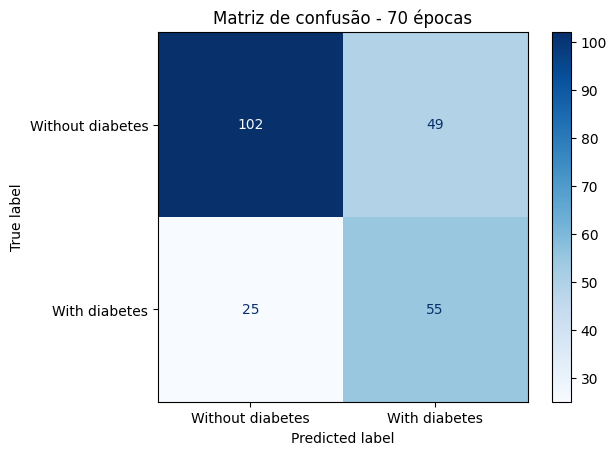

Accuracy (80 épocas): 0.6667
Precision (80 épocas): 0.5138
Recall (80 épocas): 0.7000
F1-Score (80 épocas): 0.5926


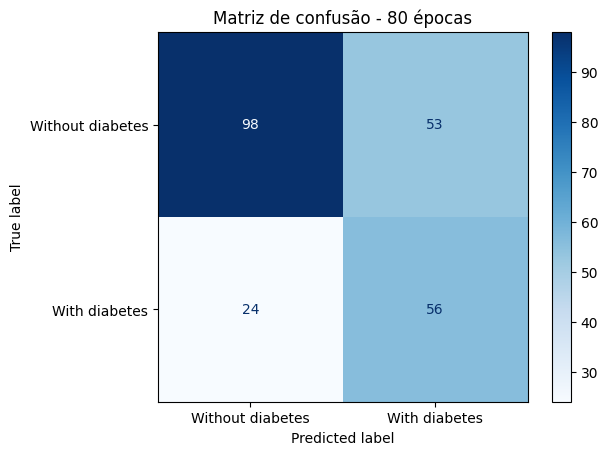

Accuracy (90 épocas): 0.6580
Precision (90 épocas): 0.5049
Recall (90 épocas): 0.6500
F1-Score (90 épocas): 0.5683


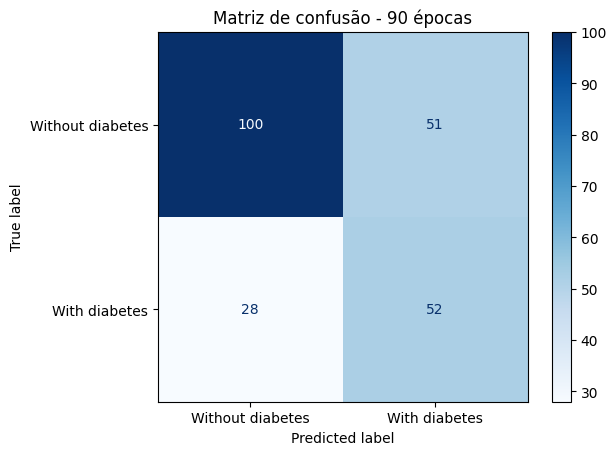

Accuracy (100 épocas): 0.7229
Precision (100 épocas): 0.5690
Recall (100 épocas): 0.8250
F1-Score (100 épocas): 0.6735


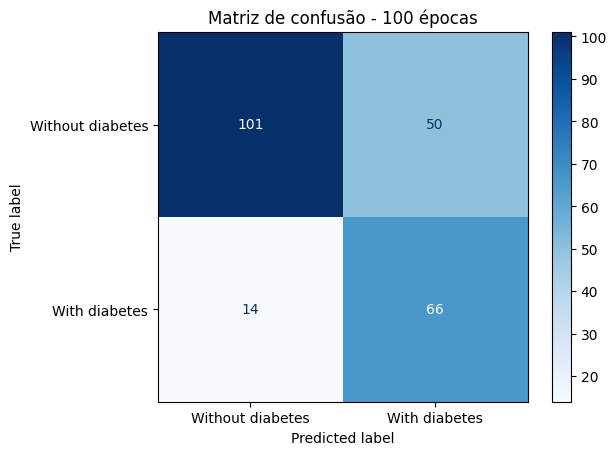

In [12]:
Epocas2 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
VetorW = []
for i in range(len(Epocas2)):
    w, Epoca = TreinamentoPerceptron(X_train_diabetes, Y_train_diabetes, 0.1, Epocas2[i], 42)
    VetorW.append(w)
    print("Pesos finais:", w)
    print("Epocas: ", Epoca)

for i in range(len(Epocas2)):
    VetorClasses = FaseOperacaoPerceptron(X_test_diabetes, VetorW[i])

    acc = accuracy_score(Y_test_diabetes, VetorClasses)
    prec = precision_score(Y_test_diabetes, VetorClasses)
    rec = recall_score(Y_test_diabetes, VetorClasses)
    f1 = f1_score(Y_test_diabetes, VetorClasses)
    print(f"Accuracy ({Epocas2[i]} épocas): {acc:.4f}")
    print(f"Precision ({Epocas2[i]} épocas): {prec:.4f}")
    print(f"Recall ({Epocas2[i]} épocas): {rec:.4f}")
    print(f"F1-Score ({Epocas2[i]} épocas): {f1:.4f}")

    cm = confusion_matrix(Y_test_diabetes, VetorClasses, labels=[-1, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Without diabetes", "With diabetes"])
    disp.plot(cmap="Blues")
    plt.title(f"Matriz de confusão - {Epocas2[i]} épocas")
    plt.show()